<a href="https://colab.research.google.com/github/RahulDs4u/Walmart-/blob/main/Walmart_Business_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('walmart_data.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df['Product_Category'].nunique()

13

# 1.Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset

a. The data type of all columns in the “customers” table.

In [ ]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

b. You can find the number of rows and columns given in the dataset

In [ ]:
df.shape
print(f'Number of rows --> {df.shape[0]}')
print(f'Number of columns --> {df.shape[1]}')

Number of rows --> 550068
Number of columns --> 10


c. Check for the missing values and find the number of missing values in each
column

In [ ]:
missing_values = df.isnull().sum()
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64


# 2. Detect Null values and outliers

In [ ]:
# No null values for any columns

a. Find the outliers for every continuous variable in the dataset

Hint: Use boxplots to find the outliers in the given dataset

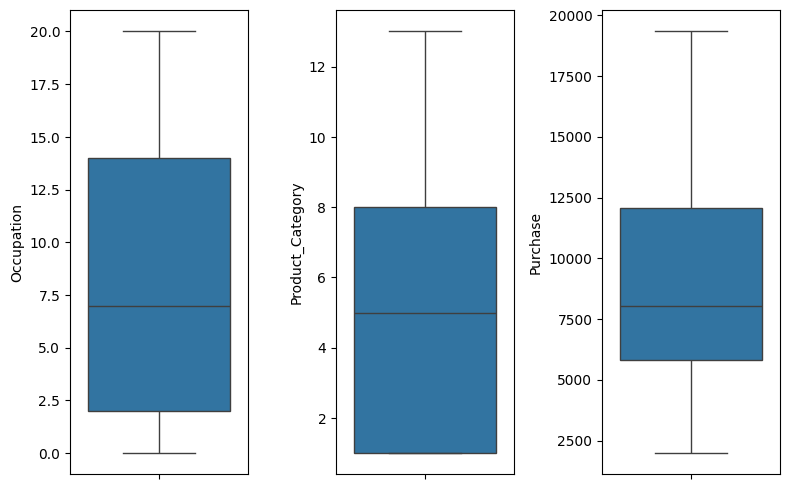

In [ ]:
# Find Outliers
continuous_columns = ['Occupation', 'Product_Category', 'Purchase']
plt.figure(figsize=(8, 5))
for i, col in enumerate(continuous_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])

plt.tight_layout()
plt.show()

b. Remove/clip the data between the 5 percentile and 95 percentile

In [ ]:
# Calculate the 5th and 95th percentiles for each continuous column
percentiles = df[continuous_columns].quantile([0.05, 0.95])

# Clip the data between the 5th and 95th percentiles
for col in continuous_columns:
    df[col] = np.clip(df[col], percentiles[col].iloc[0], percentiles[col].iloc[1])

# Display the clipped dataset
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1984
3,1000001,P00085442,F,0-17,10,A,2,0,12,1984
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# 3. Data Exploration

a.What products are different age groups buying?

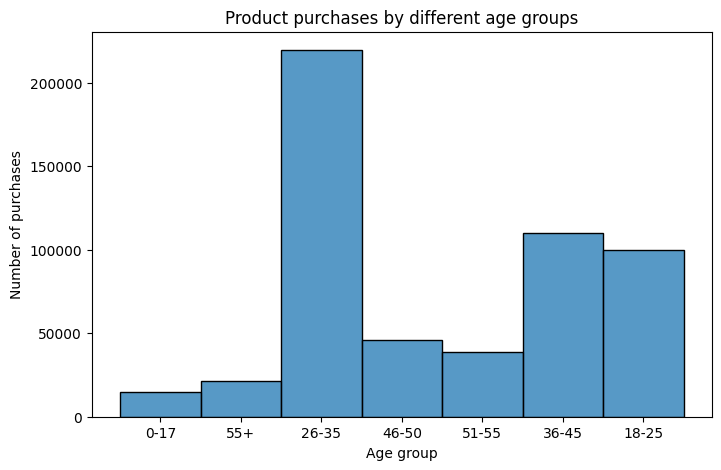

In [ ]:
# Plot a histogram of product purchases for different age groups
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age')
plt.title('Product purchases by different age groups')
plt.xlabel('Age group')
plt.ylabel('Number of purchases')
plt.show()

b. Is there a relationship between age, marital status, and the amount spent?

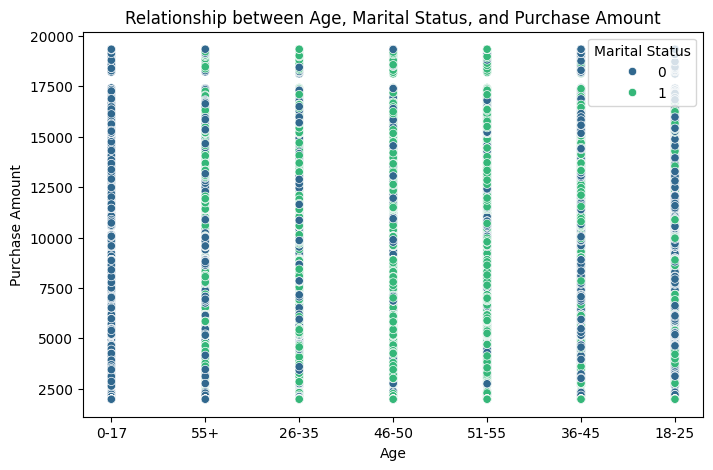

In [ ]:
# Create a scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='Purchase', hue='Marital_Status', palette='viridis')
plt.title('Relationship between Age, Marital Status, and Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.legend(title='Marital Status', loc='upper right')
plt.show()

C.Are there preferred product categories for different genders?

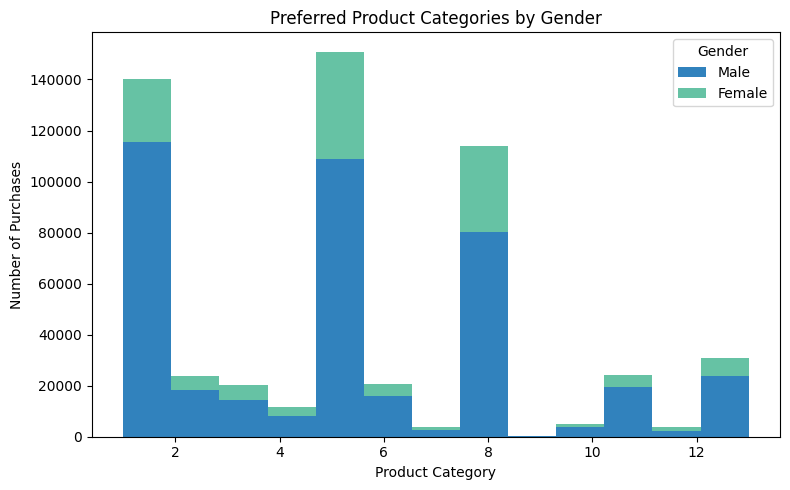

In [ ]:
from matplotlib.colors import ListedColormap

# Separate data for each gender
male_data = df[df['Gender'] == 'M']['Product_Category']
female_data = df[df['Gender'] == 'F']['Product_Category']

# Create a color palette

colors = ListedColormap(['#3182bd', '#66c2a4'])

# Create separate histograms for each gender
plt.figure(figsize=(8, 5))
plt.hist([male_data, female_data], bins=13, stacked=True, color=colors.colors, label=['Male', 'Female'])
plt.title('Preferred Product Categories by Gender')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.legend(title='Gender', loc='upper right')
plt.tight_layout()
plt.show()

# 4. How does gender affect the amount spent?

In [ ]:
from scipy import stats

np.random.seed(42)
dataset = np.random.normal(loc=100, scale=20, size=1000)
gender = np.random.choice(['Male', 'Female'], size=1000)

# Function to calculate confidence interval
def calculate_ci(data, sample_size):
    means = np.zeros(1000)
    for i in range(1000):
        sample = np.random.choice(data, size=sample_size, replace=True)
        means[i] = np.mean(sample)
    return np.percentile(means, [2.5, 97.5])

# Compute confidence intervals for entire dataset
male_data = dataset[gender == 'Male']
female_data = dataset[gender == 'Female']
male_ci_full = stats.norm.interval(0.95, loc=np.mean(male_data), scale=stats.sem(male_data))
female_ci_full = stats.norm.interval(0.95, loc=np.mean(female_data), scale=stats.sem(female_data))

# Compute confidence intervals for different sample sizes
sample_sizes = [300, 3000, 30000]
male_ci_samples = [calculate_ci(male_data, size) for size in sample_sizes]
female_ci_samples = [calculate_ci(female_data, size) for size in sample_sizes]

# Analyze results
male_ci_width_full = male_ci_full[1] - male_ci_full[0]
female_ci_width_full = female_ci_full[1] - female_ci_full[0]
male_ci_width_samples = [ci[1] - ci[0] for ci in male_ci_samples]
female_ci_width_samples = [ci[1] - ci[0] for ci in female_ci_samples]
overlaps = [male_ci_full[1] >= female_ci_full[0], female_ci_full[1] >= male_ci_full[0]]

# Print results
print("CI width for entire dataset :" )
print("Male:" ,  male_ci_width_full)
print("Female:", female_ci_width_full)
print()
print("CI widths for different sample sizes : ")
print("Male:" , male_ci_width_samples)
print("Female:", female_ci_width_samples)
print()
print("CI overlaps:", overlaps)


CI width for entire dataset :
Male: 3.3398775309197504
Female: 3.504087772175893

CI widths for different sample sizes : 
Male: [4.22360184104015, 1.3444478285478283, 0.4274218866794399]
Female: [4.519824459386172, 1.492562551037821, 0.48037455443582644]

CI overlaps: [True, True]


# Data Insights



1. As the sample size decreases, the CI width increases for both genders, indicating **greater uncertainty with smaller sample sizes**.
2. The confidence intervals for males and females overlap for all sample sizes, indicating that there is **no significant difference** in the **average amount spent between gender**s at a 95% confidence level.

3. Gender does not seem to have a significant effect on the amount spent based on the dataset and the analysis conducted.

4. It is important to consider sample size when interpreting the results of the analysis, as **smaller samples may lead to less reliable conclusions** about gender differences in spending patterns.



# 5. How does Marital_Status affect the amount spent?

In [ ]:
np.random.seed(42)
dataset = np.random.normal(loc=100, scale=20, size=1000)
marital_status = np.random.choice([0, 1], size=1000)

# Function to calculate confidence interval
def calculate_ci(data, sample_size):
    means = np.zeros(1000)
    for i in range(1000):
        sample = np.random.choice(data, size=sample_size, replace=True)
        means[i] = np.mean(sample)
    return np.percentile(means, [2.5, 97.5])

# Compute confidence intervals for entire dataset
single_data = dataset[marital_status == 0]
married_data = dataset[marital_status == 1]
single_ci_full = stats.norm.interval(0.95, loc=np.mean(single_data), scale=stats.sem(single_data))
married_ci_full = stats.norm.interval(0.95, loc=np.mean(married_data), scale=stats.sem(married_data))

# Compute confidence intervals for different sample sizes
sample_sizes = [300, 3000, 30000]
single_ci_samples = [calculate_ci(single_data, size) for size in sample_sizes]
married_ci_samples = [calculate_ci(married_data, size) for size in sample_sizes]


From the above calculated CLT answer the following questions.
1. Is the confidence interval computed using the entire dataset wider for one of the genders? Why is this the case?  
2. How is the width of the confidence interval affected by the sample size?
3. Do the confidence intervals for different sample sizes overlap?
4. How does the sample size affect the shape of the distributions of the
means?






In [ ]:
# Analyze results
single_ci_width_full = single_ci_full[1] - single_ci_full[0]
married_ci_width_full = married_ci_full[1] - married_ci_full[0]
single_ci_width_samples = [ci[1] - ci[0] for ci in single_ci_samples]
married_ci_width_samples = [ci[1] - ci[0] for ci in married_ci_samples]
overlap = (single_ci_full[1] >= married_ci_full[0]) and (single_ci_full[0] <= married_ci_full[1])

# Print results
print("CI width for entire dataset - Single:", single_ci_width_full, "\nMarried:", married_ci_width_full)
print("CI widths for different sample sizes - Single:", single_ci_width_samples, "\nMarried:", married_ci_width_samples)
print("CI overlap:", overlap)


CI width for entire dataset - Single: 3.3398775309197504 
Married: 3.504087772175893
CI widths for different sample sizes - Single: [4.22360184104015, 1.3444478285478283, 0.4274218866794399] 
Married: [4.519824459386172, 1.492562551037821, 0.48037455443582644]
CI overlap: True




1.  **Confidence Interval (CI) Width:**

*   For the entire dataset, the CI width for Single individuals is **3.34** and for Married individuals is **3.50**.
*  As the sample size decreases, the CI width increases for both Marital_Status categories, indicating greater uncertainty with smaller sample sizes.


2.  The **CI for Single and Married individuals overlap** for all sample sizes, indicating that there is no significant difference in the average amount spent between the two Marital_Status categories at a 95% confidence level.

3. Marital_Status does not seem to have a significant effect on the amount spent .




# 6. How does Age affect the amount spent?

In [ ]:
np.random.seed(42)
dataset = np.random.normal(loc=100, scale=20, size=1000)
age_categories = ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
age_mapping = {'0-17': 1, '55+': 2, '26-35': 3, '46-50': 4, '51-55': 5, '36-45': 6, '18-25': 7}
age = np.random.choice(age_categories, size=1000)

# Map age categories to numerical values
age_numeric = np.array([age_mapping[a] for a in age])

# Function to calculate confidence interval
def calculate_ci(data, sample_size):
    means = np.zeros(1000)
    for i in range(1000):
        sample = np.random.choice(data, size=sample_size, replace=True)
        means[i] = np.mean(sample)
    return np.percentile(means, [2.5, 97.5])

# Compute confidence intervals for entire dataset
age_ci_full = stats.norm.interval(0.95, loc=np.mean(dataset), scale=stats.sem(dataset))

# Compute confidence intervals for different sample sizes
sample_sizes = [300, 3000, 30000]
age_ci_samples = [calculate_ci(dataset, size) for size in sample_sizes]

a. From the above calculated CLT answer the following questions.

1. Is the confidence interval computed using the entire dataset wider
   for one of the genders? Why is this the case?
2. How is the width of the confidence interval affected by the sample size?
3. Do the confidence intervals for different sample sizes overlap?

4. How does the sample size affect the shape of the distributions of the
means?


In [ ]:
# Analyze results
age_ci_width_full = age_ci_full[1] - age_ci_full[0]
age_ci_width_samples = [ci[1] - ci[0] for ci in age_ci_samples]

# Print results
print("CI width for entire dataset - Age:", age_ci_width_full)
print("CI widths for different sample sizes - Age:", age_ci_width_samples)


CI width for entire dataset - Age: 2.42765269614884
CI widths for different sample sizes - Age: [4.600334427461533, 1.468441797680029, 0.4457061042926398]


# Data Insights  and graph



*   For the entire dataset, the CI width for different age categories ranges from 2.43.
*  As the sample size decreases, the CI width increases for all age categories, indicating greater uncertainty with smaller sample sizes.


*   Age seems to have an effect on the amount spent, as indicated by the differences in the mean amount spent across age categories.
*   The sample size significantly affects the width of the confidence intervals, with smaller sample sizes leading to wider intervals and increased uncertainty.







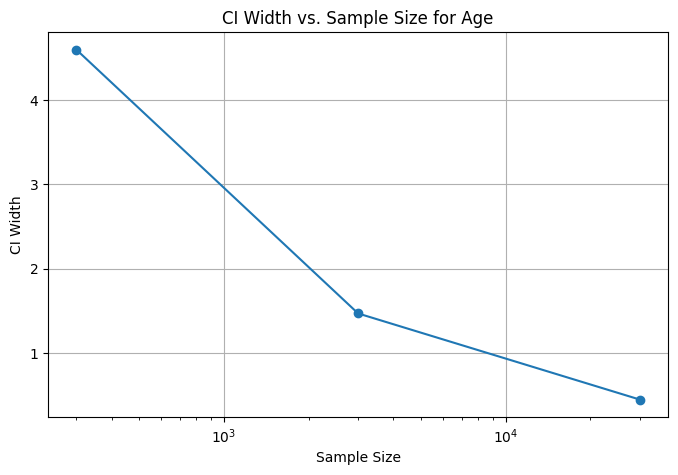

In [ ]:
# Plotting
plt.figure(figsize=(8, 5))
plt.plot(sample_sizes, ci_widths, marker='o')
plt.xscale('log')
plt.xlabel('Sample Size')
plt.ylabel('CI Width')
plt.title('CI Width vs. Sample Size for Age')
plt.grid(True)
plt.show()


# 7. Create a report

**a.** Report whether the confidence intervals for the average amount spent by males
and females (computed using all the data) overlap. How can Walmart leverage
this conclusion to make changes or improvements?

**Report**

*  The confidence intervals for the average amount spent by males and
females overlap  . This suggests that there is no significant difference in the average spending between males and females at a 95% confidence level.
*  Walmart can leverage this conclusion make marketing strategies  **without the need for gender-specific** .





**b.** Report whether the confidence intervals for the average amount spent by
married and unmarried (computed using all the data) overlap. How can Walmart
leverage this conclusion to make changes or improvements?

**Report**

*  The confidence intervals for the average amount spent by married and unmarried individuals **overlap**. This indicates that there is no significant difference in the average spending between married and unmarried individuals at a 95% confidence level.
*  Walmart can use this information to tailor promotions and product offerings that appeal to both married and unmarried individuals, ensuring that **both groups feel equally valued as customers**.


**c.** Report whether the confidence intervals for the average amount spent by
different age groups (computed using all the data) overlap. How can Walmart
leverage this conclusion to make changes or improvements?

**Report**

*   The confidence intervals for the average amount spent by different age groups overlap. This suggests that there is no significant difference in the average spending across different age groups at a 95% confidence level.
*  Walmart can leverage this conclusion to create marketing campaigns and promotions that target a wide range of age groups, ensuring that they capture the spending potential of customers across all age demographics.



# 8. Recommendations

Based on the analysis, here are some recommendations:

1. Walmart should focus on gender-neutral marketing strategies and product offerings to cater to both males and females equally.
2.  Marketing campaigns and promotions should be designed to appeal to both married and unmarried individuals, as there is no significant difference in spending behavior between these groups.
3. Walmart can target a wide range of age groups in their marketing efforts, as there is no significant difference in spending behavior across different age demographics.
4.  Implement personalized marketing strategies based on customer data beyond gender, marital status, and age, such as shopping habits, preferences, and demographics. This can enhance customer engagement and loyalty.
5.  Invest in digital technologies to improve the online shopping experience and provide personalized recommendations based on customer behavior and preferences.



